# 1. Perkenalan

```
Program ini dibuat untuk menganalisa penjualan perusahaan selama 1 minggu pertama di Bulan Juli 2024. Hasil visualisasi dari analisa data ini akan dituangkan dalam Tableau pada link berikut: [Tableau]() 

## Business Understanding

SMART FrameWork
* Spesific => 
* Measurable => 
* Achieveble =>
* Relevant =>
* Time Bond => 

Problem Statement

# 2. Import Libraries

In [243]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Data Loading

In [244]:
df = pd.read_csv("dataset.csv")
df

,DATE,AIRLINES,ORIGIN,DESTINATION,FLIGHT_NUMB,COLLY,WEIGHT,CUSTOMER,CUST_ID,SERVICE,COST_A,COST_B,COST_C,PRICE
0,01/Jul/2024,CITILINK,JAKARTA,MEDAN,QG-0916,5,"72,00",PT DINDA SETIA KIRANA,DSK,PTP,9324,4343,2809,11300
1,01/Jul/2024,CITILINK,JAKARTA,BALIKPAPAN,QG-0436,1,"15,00",PT FAJRI ABANGDA PRATAMA,FAP,PTP,15984,4343,1258,31200
2,01/Jul/2024,CITILINK,JAKARTA,MAKASSAR,QG-0426,6,"77,00",PT FAJRI ABANGDA PRATAMA,FAP,PTP,13653,4343,1594,34800
3,01/Jul/2024,CITILINK,JAKARTA,BATAM,QG-0968,6,"95,00",PT DINDA SETIA KIRANA,DSK,PTP,10545,4343,2280,11050
4,01/Jul/2024,CITILINK,JAKARTA,BALIKPAPAN,QG-0424,7,"100,00",PT DINDA SETIA KIRANA,DSK,PTP,15984,4343,1258,22100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28658,07/Jul/2025,FREIGHTER,JAKARTA,TARAKAN,ECA245,2,"10,00",PT BAYA SKENA MENYALA,BSM,DTD,35964,3888,0,42870
28659,07/Jul/2024,FREIGHTER,JAKARTA,TARAKAN,ECA245,5,"51,00",PT DINDA SETIA KIRANA,DSK,PTP,35964,3888,0,38200
28660,07/Jul/2024,FREIGHTER,JAKARTA,TARAKAN,ECA245,11,"123,00",PT DINDA SETIA KIRANA,DSK,PTP,35964,3888,0,38200
28661,07/Jul/2024,FREIGHTER,JAKARTA,TARAKAN,ECA245,10,"127,00",PT DINDA SETIA KIRANA,DSK,PTP,35964,3888,0,38200


Data terdisi dari 14 kolom dan 28.663 baris. Berikut ini penjelasan informasi dari setiap kolom:
* DATE          : Tanggal transaksi 
* AIRLINES      : Maskapai yang digunakan untuk pengiriman cargo 
* ORIGIN        : Kota asal pengiriman 
* DESTINATION   : Kota tujuan pengiriman
* FLIGHT_NUMB   : Kode penerbangan berdasarkan maskapai dan rute
* COLLY         : Jumlah karung pengiriman 
* WEIGHT        : Total berat pengiriman dari semua jumlah karungan 
* CUSTOMER      : Nama Customer 
* CUST_ID       : Kode unik Customer 
* SERVICE       : Jenis service pengiriman yang digunakan 
* COST_A        : Komponen cost 1 
* COST_B        : Komponen cost 2 
* COST_C        : Komponen cost 3 
* PRICE         : Harga jual per Kg 

Selanjutnya akan dilakukan pengecekan terhadap jenis data dari masing-masing kolom dan keberadaan missing value.

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28663 entries, 0 to 28662
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DATE         28663 non-null  object
 1   AIRLINES     28663 non-null  object
 2   ORIGIN       28663 non-null  object
 3   DESTINATION  28663 non-null  object
 4   FLIGHT_NUMB  28663 non-null  object
 5   COLLY        28663 non-null  int64 
 6    WEIGHT      28663 non-null  object
 7   CUSTOMER     28654 non-null  object
 8   CUST_ID      28663 non-null  object
 9   SERVICE      28663 non-null  object
 10  COST_A       28663 non-null  int64 
 11  COST_B       28663 non-null  int64 
 12  COST_C       28663 non-null  int64 
 13  PRICE        28663 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 3.1+ MB


Dapat dilihat bahwa data memiliki beberapa 9 missing value pada kolom CUSTOMER dan terdapat kolom DATE dan kolom WEIGHT yang memiliki jenis data yang tidak sesuai

In [246]:
df['CUSTOMER'].unique()

array(['PT DINDA SETIA KIRANA', 'PT FAJRI ABANGDA PRATAMA', nan,
       'PT ADANI SUBUR MAKMUR', 'PT BAYA SKENA MENYALA',
       'PT HABIB REZA ALKARIM', 'PT PRIMA CAHAYA MEGA'], dtype=object)

In [247]:
df['CUSTOMER'].mode()

0    PT PRIMA CAHAYA MEGA
Name: CUSTOMER, dtype: object

# 4. Data Cleaning

## Penghapusan White Space Pada Nama Kolom dan Value Kolom

In [248]:
df.columns = df.columns.str.strip()

In [249]:
df.columns

Index(['DATE', 'AIRLINES', 'ORIGIN', 'DESTINATION', 'FLIGHT_NUMB', 'COLLY',
       'WEIGHT', 'CUSTOMER', 'CUST_ID', 'SERVICE', 'COST_A', 'COST_B',
       'COST_C', 'PRICE'],
      dtype='object')

In [250]:
df['WEIGHT'].unique()

array(['  72,00 ', '  15,00 ', '  77,00 ', '  95,00 ', '  100,00 ',
       '  17,00 ', '  40,00 ', '  157,00 ', '  89,00 ', '  10,00 ',
       '  18,00 ', '  21,00 ', '  171,00 ', '  147,00 ', '  66,00 ',
       '  334,00 ', '  23,00 ', '  90,00 ', '  137,00 ', '  217,00 ',
       '  323,00 ', '  85,00 ', '  34,00 ', '  55,00 ', '  12,00 ',
       '  78,00 ', '  69,00 ', '  141,00 ', '  170,00 ', '  36,00 ',
       '  50,00 ', '  27,00 ', '  11,00 ', '  56,00 ', '  58,00 ',
       '  47,00 ', '  28,00 ', '  63,00 ', '  62,00 ', '  98,00 ',
       '  200,00 ', '  81,00 ', '  19,00 ', '  26,00 ', '  24,00 ',
       '  61,00 ', '  31,00 ', '  173,00 ', '  74,00 ', '  53,00 ',
       '  142,00 ', '  13,00 ', '  42,00 ', '  29,00 ', '  73,00 ',
       '  38,00 ', '  60,00 ', '  14,00 ', '  112,00 ', '  80,00 ',
       '  20,00 ', '  43,00 ', '  37,00 ', '  218,00 ', '  35,00 ',
       '  190,00 ', '  114,00 ', '  160,00 ', '  59,00 ', '  232,00 ',
       '  520,00 ', '  252,00 ', '  254,00 

In [251]:
df['WEIGHT'] = df['WEIGHT'].str.replace(" ", "").str.replace('.', '').str.replace(',', '.')
df['WEIGHT'].unique()

array(['72.00', '15.00', '77.00', '95.00', '100.00', '17.00', '40.00',
       '157.00', '89.00', '10.00', '18.00', '21.00', '171.00', '147.00',
       '66.00', '334.00', '23.00', '90.00', '137.00', '217.00', '323.00',
       '85.00', '34.00', '55.00', '12.00', '78.00', '69.00', '141.00',
       '170.00', '36.00', '50.00', '27.00', '11.00', '56.00', '58.00',
       '47.00', '28.00', '63.00', '62.00', '98.00', '200.00', '81.00',
       '19.00', '26.00', '24.00', '61.00', '31.00', '173.00', '74.00',
       '53.00', '142.00', '13.00', '42.00', '29.00', '73.00', '38.00',
       '60.00', '14.00', '112.00', '80.00', '20.00', '43.00', '37.00',
       '218.00', '35.00', '190.00', '114.00', '160.00', '59.00', '232.00',
       '520.00', '252.00', '254.00', '464.00', '120.00', '296.00',
       '71.00', '298.00', '82.00', '384.00', '93.00', '294.00', '345.00',
       '46.00', '135.00', '584.00', '119.00', '340.00', '196.00',
       '293.00', '462.00', '41.00', '359.00', '447.00', '152.00',
       '

In [252]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Kolom {col}: {unique_values}\n")

Kolom DATE: ['01/Jul/2024' '01/Jul/2025' '02/Jul/2024' '03/Jul/2024' '05/Jul/2024'
 '05/Jul/2025' '04/Jul/2024' '03/Jul/2025' '06/Jul/2024' '07/Jul/2024'
 '07/Jul/2025']

Kolom AIRLINES: ['CITILINK' 'GARUDA' 'LION AIR' 'SRIWIJAYA AIR' 'FREIGHTER' 'PELITA AIR']

Kolom ORIGIN: ['JAKARTA' 'DKI JAKARTA' 'DENPASAR' 'MEDAN' 'PONTIANAK' 'SOLO' 'MAKASSAR'
 'SURABAYA' 'SEMARANG' 'BALIKPAPAN' 'PEKANBARU' 'KENDARI' 'BANJARMASIN'
 'PADANG' 'BATAM' 'PALU' 'PALANGKARAYA' 'MANADO']

Kolom DESTINATION: ['MEDAN' 'BALIKPAPAN' 'MAKASSAR' 'BATAM' 'BANJARMASIN' 'BENGKULU'
 'PONTIANAK' 'PADANG' 'KENDARI' 'SURABAYA' 'DENPASAR' 'PEKANBARU'
 'SAMARINDA' 'PALANGKARAYA' 'PANGKAL PINANG' 'TANJUNG PINANG' 'PALEMBANG'
 'AMBON' 'BALIK PAPAN' 'JAYAPURA' 'TARAKAN' 'JAMBI' 'LOMBOK' 'TIMIKA'
 'ACEH' 'KUPANG' 'MANADO' 'PALU' 'TERNATE' 'TANJUNG PANDAN' 'SOLO'
 'SEMARANG' 'LAMPUNG' 'GORONTALO' 'SORONG' 'MANOKWARI' 'PANGKALANBUN'
 'LABUAN BAJO' 'BANYUWANGI' 'MALANG' 'BIAK' 'MERAUKE' 'JAKARTA'
 'BANDA ACEH']

Kolom FLIGHT_NU

Dari hasil analisa di atas, dapat dilihat bahwa kolom ORIGIN memiliki 2 value yang sebenarnya sama yaitu JAKARTA dan DKI JAKARTA. Oleh karena itu, kedua value tersebut akan disamakan untuk memudahkan identifikasi

In [253]:
df['ORIGIN'] = df['ORIGIN'].str.replace('DKI JAKARTA', 'JAKARTA')
df['ORIGIN'].unique()

array(['JAKARTA', 'DENPASAR', 'MEDAN', 'PONTIANAK', 'SOLO', 'MAKASSAR',
       'SURABAYA', 'SEMARANG', 'BALIKPAPAN', 'PEKANBARU', 'KENDARI',
       'BANJARMASIN', 'PADANG', 'BATAM', 'PALU', 'PALANGKARAYA', 'MANADO'],
      dtype=object)

In [254]:
df.columns

Index(['DATE', 'AIRLINES', 'ORIGIN', 'DESTINATION', 'FLIGHT_NUMB', 'COLLY',
       'WEIGHT', 'CUSTOMER', 'CUST_ID', 'SERVICE', 'COST_A', 'COST_B',
       'COST_C', 'PRICE'],
      dtype='object')

Selain itu, kita juga dapat melihat kesalahan pada kolom DATE yaitu pada penulisan tahun. Data ini merupakan data penjualan perusahaan pada minggu pertama bulan Juli tahun 2024. Namun, ada kesalahan pada beberapa value yang tertulis tahun 2025. Oleh karena itu kita akan melakukan perbaikan sebagai berikut

In [255]:
df['DATE'] = df['DATE'].str.replace('2025', '2024')

print(f'Nilai unik kolom DATE: ', df['DATE'].unique())

Nilai unik kolom DATE:  ['01/Jul/2024' '02/Jul/2024' '03/Jul/2024' '05/Jul/2024' '04/Jul/2024'
 '06/Jul/2024' '07/Jul/2024']


## Ubah Tipe Data

In [256]:
df['WEIGHT'] = df['WEIGHT'].astype(float)
df['DATE'] = pd.to_datetime(df['DATE'])
df[['WEIGHT', 'DATE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28663 entries, 0 to 28662
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   WEIGHT  28663 non-null  float64       
 1   DATE    28663 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 448.0 KB


In [257]:
df['DATE'] = pd.to_datetime(df['DATE'])

## Handling Missing Value

Handling missing value yang terdapat pada kolom CUSTOMER akan dilakukan dengan cara melihat pola yang terdapat pada kolom lain, dalam hal ini adalah kolom CUST_ID

In [258]:
df[df['CUSTOMER'].isna()]

,DATE,AIRLINES,ORIGIN,DESTINATION,FLIGHT_NUMB,COLLY,WEIGHT,CUSTOMER,CUST_ID,SERVICE,COST_A,COST_B,COST_C,PRICE
22,2024-07-01,CITILINK,JAKARTA,MEDAN,QG-0978,9,90.0,NaN,FAP,PTP,9324,4343,2809,25200
65,2024-07-01,CITILINK,JAKARTA,DENPASAR,QG-0684,1,11.0,NaN,DSK,PTP,8103,4343,2200,9025
28193,2024-07-04,FREIGHTER,JAKARTA,TERNATE,RA-2024,5,44.0,NaN,BSM,DTD,43290,4010,0,51690
28194,2024-07-04,FREIGHTER,JAKARTA,PALU,RA-2024,16,140.0,NaN,MEG,DTD,36297,5010,0,47795
28195,2024-07-04,FREIGHTER,JAKARTA,TERNATE,RA-2024,5,55.0,NaN,BSM,DTD,43290,4010,0,51690
28323,2024-07-06,FREIGHTER,JAKARTA,PALU,RA-2024,2,39.0,NaN,MEG,DTD,36297,5010,0,47795
28419,2024-07-07,FREIGHTER,JAKARTA,PALU,RA-2024,3,35.0,NaN,DSK,PTP,36297,4010,0,42250
28594,2024-07-05,FREIGHTER,JAKARTA,TARAKAN,ECA245,15,150.0,NaN,DSK,PTP,35964,3888,0,38200
28646,2024-07-07,FREIGHTER,JAKARTA,TARAKAN,ECA245,3,41.0,NaN,BSM,DTD,35964,3888,0,42870


In [259]:
customer_id_target = ['FAP', 'DSK', 'BSM', 'MEG']
seen = set ()

for index, row in df.iterrows():
    if row['CUST_ID'] in customer_id_target and row['CUST_ID'] not in seen:
        print(f"Customer {row['CUST_ID']}: {row['CUSTOMER']}")
        seen.add(row['CUST_ID'])

Customer DSK: PT DINDA SETIA KIRANA
Customer FAP: PT FAJRI ABANGDA PRATAMA
Customer BSM: PT BAYA SKENA MENYALA
Customer MEG: PT PRIMA CAHAYA MEGA


In [260]:
df[(df['FLIGHT_NUMB'] == 'RA-2024') & (df['CUST_ID'] == 'MEG') & (df['COLLY'] == 2)  & (df['WEIGHT'] == 39)]

,DATE,AIRLINES,ORIGIN,DESTINATION,FLIGHT_NUMB,COLLY,WEIGHT,CUSTOMER,CUST_ID,SERVICE,COST_A,COST_B,COST_C,PRICE
28323,2024-07-06,FREIGHTER,JAKARTA,PALU,RA-2024,2,39.0,NaN,MEG,DTD,36297,5010,0,47795


In [261]:
def fill_missing(row):
    if pd.isna(row['CUSTOMER']):
        if (row['FLIGHT_NUMB'] == 'QG-0978') & (row['CUST_ID'] == 'FAP') & (row['COLLY'] == 9):
            return "PT FAJRI ABANGDA PRATAMA"
        if (row['CUST_ID'] == 'DSK'):
            if ((row['FLIGHT_NUMB'] == 'QG-0684') & (row['COLLY'] == 1) & (row['WEIGHT'] == 11)) or \
                ((row['FLIGHT_NUMB'] == 'RA-2024') & (row['COLLY'] == 3) & (row['WEIGHT'] == 35)) or \
                ((row['FLIGHT_NUMB'] == 'ECA245') & (row['COLLY'] == 15) & (row['WEIGHT'] == 150)): 
                    return "PT DINDA SETIA KIRANA"
        elif (row['CUST_ID'] == 'BSM'):
            if ((row['FLIGHT_NUMB'] == 'RA-2024') & (row['COLLY'] == 5) & (row['WEIGHT'] == 44)) or \
                ((row['FLIGHT_NUMB'] == 'RA-2024') & (row['COLLY'] == 5) & (row['WEIGHT'] == 55)) or \
                ((row['FLIGHT_NUMB'] == 'ECA245') & (row['COLLY'] == 3) & (row['WEIGHT'] == 41)):
                    return 'PT BAYA SKENA MENYALA'
        elif (row['CUST_ID'] == 'MEG'):
            if ((row['FLIGHT_NUMB'] == 'RA-2024') & (row['COLLY'] == 16) & (row['WEIGHT'] == 140)) or \
                ((row['FLIGHT_NUMB'] == 'RA-2024') & (row['COLLY'] == 2) & (row['WEIGHT'] == 39)):
                    return "PT PRIMA CAHAYA MEGA"
    return row['CUSTOMER']

#apply ke kolom 'CUSTOMER'
df['CUSTOMER'] = df.apply(fill_missing, axis=1)

print(df)

            DATE   AIRLINES   ORIGIN DESTINATION FLIGHT_NUMB  COLLY  WEIGHT  \
0     2024-07-01   CITILINK  JAKARTA       MEDAN     QG-0916      5    72.0   
1     2024-07-01   CITILINK  JAKARTA  BALIKPAPAN     QG-0436      1    15.0   
2     2024-07-01   CITILINK  JAKARTA    MAKASSAR     QG-0426      6    77.0   
3     2024-07-01   CITILINK  JAKARTA       BATAM     QG-0968      6    95.0   
4     2024-07-01   CITILINK  JAKARTA  BALIKPAPAN     QG-0424      7   100.0   
...          ...        ...      ...         ...         ...    ...     ...   
28658 2024-07-07  FREIGHTER  JAKARTA     TARAKAN      ECA245      2    10.0   
28659 2024-07-07  FREIGHTER  JAKARTA     TARAKAN      ECA245      5    51.0   
28660 2024-07-07  FREIGHTER  JAKARTA     TARAKAN      ECA245     11   123.0   
28661 2024-07-07  FREIGHTER  JAKARTA     TARAKAN      ECA245     10   127.0   
28662 2024-07-07  FREIGHTER  JAKARTA     TARAKAN      ECA245      8   111.0   

                       CUSTOMER CUST_ID SERVICE  CO

## Penghapusan Baris Duplikat

In [262]:
df_clean = df.drop_duplicates()
df_clean

,DATE,AIRLINES,ORIGIN,DESTINATION,FLIGHT_NUMB,COLLY,WEIGHT,CUSTOMER,CUST_ID,SERVICE,COST_A,COST_B,COST_C,PRICE
0,2024-07-01,CITILINK,JAKARTA,MEDAN,QG-0916,5,72.0,PT DINDA SETIA KIRANA,DSK,PTP,9324,4343,2809,11300
1,2024-07-01,CITILINK,JAKARTA,BALIKPAPAN,QG-0436,1,15.0,PT FAJRI ABANGDA PRATAMA,FAP,PTP,15984,4343,1258,31200
2,2024-07-01,CITILINK,JAKARTA,MAKASSAR,QG-0426,6,77.0,PT FAJRI ABANGDA PRATAMA,FAP,PTP,13653,4343,1594,34800
3,2024-07-01,CITILINK,JAKARTA,BATAM,QG-0968,6,95.0,PT DINDA SETIA KIRANA,DSK,PTP,10545,4343,2280,11050
4,2024-07-01,CITILINK,JAKARTA,BALIKPAPAN,QG-0424,7,100.0,PT DINDA SETIA KIRANA,DSK,PTP,15984,4343,1258,22100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28657,2024-07-07,FREIGHTER,JAKARTA,TARAKAN,ECA245,2,21.0,PT BAYA SKENA MENYALA,BSM,DTD,35964,3888,0,42870
28658,2024-07-07,FREIGHTER,JAKARTA,TARAKAN,ECA245,2,10.0,PT BAYA SKENA MENYALA,BSM,DTD,35964,3888,0,42870
28659,2024-07-07,FREIGHTER,JAKARTA,TARAKAN,ECA245,5,51.0,PT DINDA SETIA KIRANA,DSK,PTP,35964,3888,0,38200
28660,2024-07-07,FREIGHTER,JAKARTA,TARAKAN,ECA245,11,123.0,PT DINDA SETIA KIRANA,DSK,PTP,35964,3888,0,38200


## Persebaran Data

In [263]:
num_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
cat_cols = df_clean.select_dtypes(exclude=np.number).columns.tolist()

print("Kolom Numerikal: ", num_cols)
print("Kolom Kategorikal: ", cat_cols)

Kolom Numerikal:  ['COLLY', 'WEIGHT', 'COST_A', 'COST_B', 'COST_C', 'PRICE']
Kolom Kategorikal:  ['DATE', 'AIRLINES', 'ORIGIN', 'DESTINATION', 'FLIGHT_NUMB', 'CUSTOMER', 'CUST_ID', 'SERVICE']


Cek tipe persebaran data

In [264]:
listItem = []
for col in num_cols:
    listItem.append([col, round(df_clean[col].skew(),1), np.where(
        (round(df_clean[col].skew(),1)<= 0.5) & (round(df_clean[col].skew(), 1) >= -0.5),
        'Normal', 'Skewed')])
    
skewness = pd.DataFrame(columns=['Nama Kolom', 'Nilai Skewness', 'Jenis Distribusi'], data=listItem)
skewness

,Nama Kolom,Nilai Skewness,Jenis Distribusi
0,COLLY,4.1,Skewed
1,WEIGHT,114.1,Skewed
2,COST_A,1.2,Skewed
3,COST_B,-0.0,Normal
4,COST_C,-0.4,Normal
5,PRICE,1.1,Skewed


Rata-rata kolom memiliki persebaran yang bersifat skewed

## Handling Outliers

Karena data bersifat skewed, pengecekan outliers akan menggunakan metode Tukey's Rule 

In [265]:
def detect_outliers(dataframe, columns):
    outliers_summary={
        'Column': [],
        'Lower Bound': [],
        'Upper Bound': [],
        'Outliers Count': [],
        'Outliers Percentage': []
    }
    
    for col in columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]
        outliers_count = outliers.shape[0]
        outliers_percentage = (outliers_count/dataframe.shape[0])*100
        
        outliers_summary['Column'].append(col)
        outliers_summary['Lower Bound'].append(lower_bound)
        outliers_summary['Upper Bound'].append(upper_bound)
        outliers_summary['Outliers Count'].append(outliers_count)
        outliers_summary['Outliers Percentage'].append(outliers_percentage)
        
    return pd.DataFrame(outliers_summary)

outliers_report = detect_outliers(df_clean, num_cols)

outliers_report

,Column,Lower Bound,Upper Bound,Outliers Count,Outliers Percentage
0,COLLY,-15.0,33.0,416,1.660612
1,WEIGHT,-137.5,314.5,837,3.341184
2,COST_A,-15595.5,54112.5,270,1.077801
3,COST_B,1135.5,6267.5,110,0.439104
4,COST_C,-62.5,3685.5,148,0.590795
5,PRICE,-6275.0,62965.0,235,0.938086


Penanganan outliers sebenarnya ada beberapa cara diantaranya adalah Capping dan Trimming. Namun, pada kasus ini, outliers tidak akan dibiarkan karena alasan business sense dan juga jumlah outliers yang kurang dari 5% sehingga dianggap tidak akan terlalu berpengaruh terhadap keseluruhan data. Berikut akan ditampilkan visualisasi outliers untuk setiap kolom

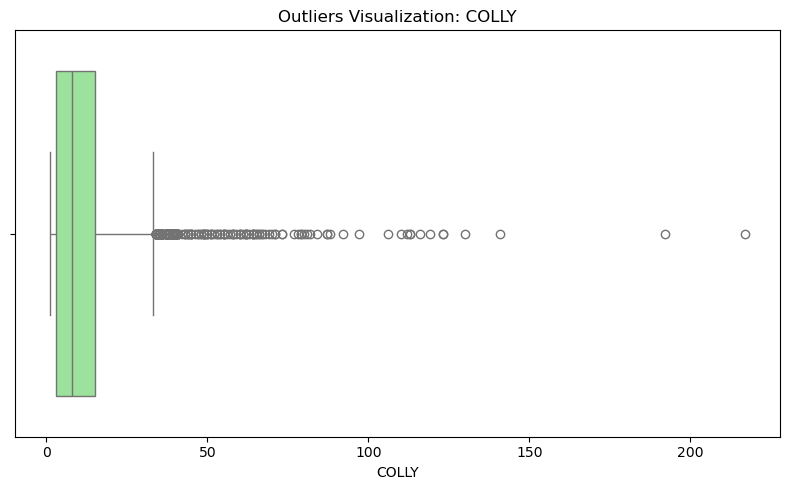

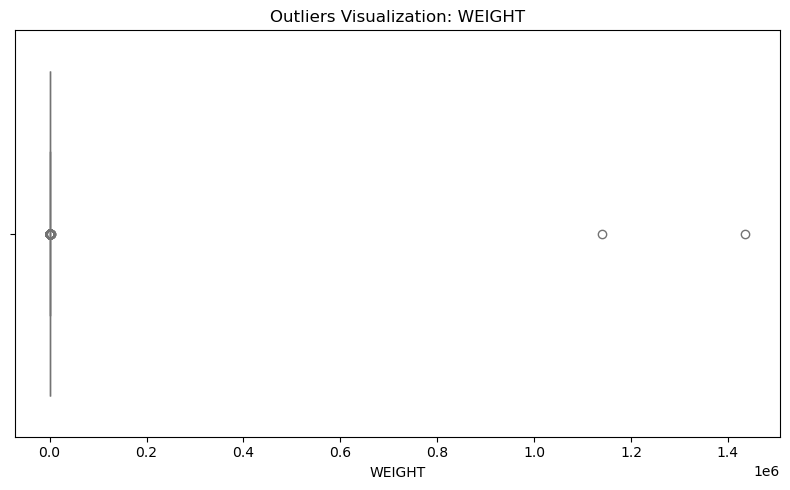

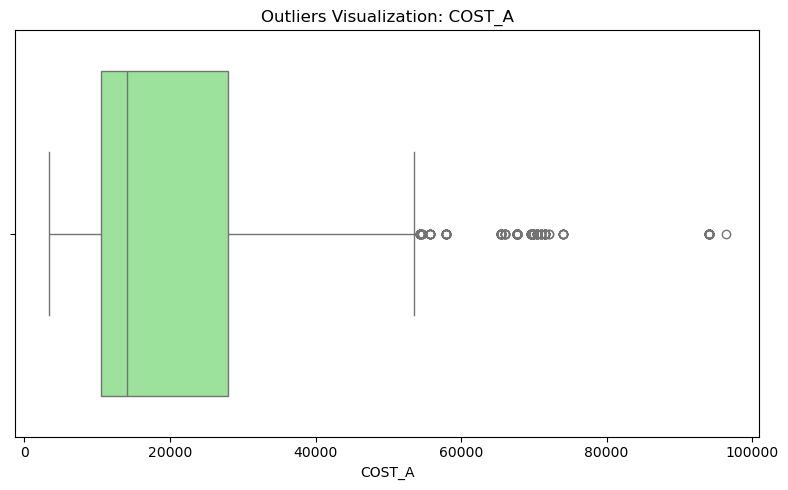

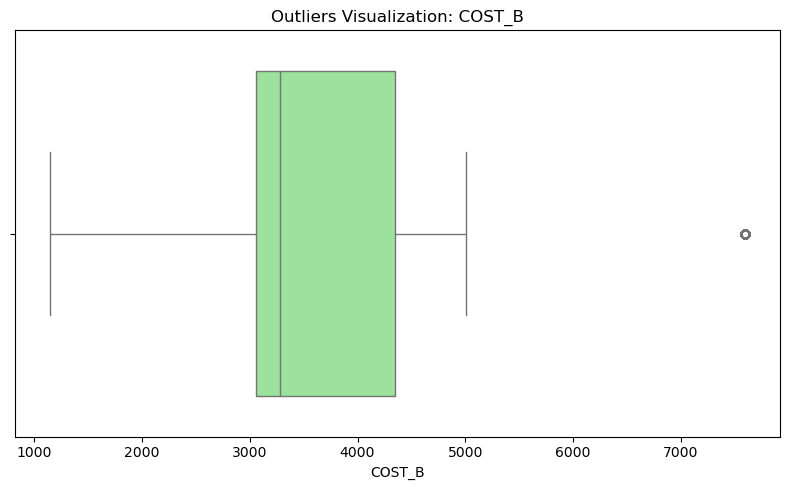

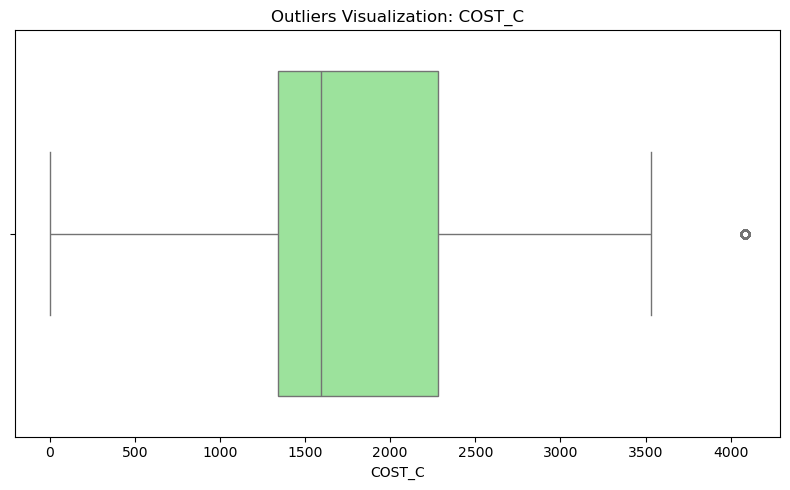

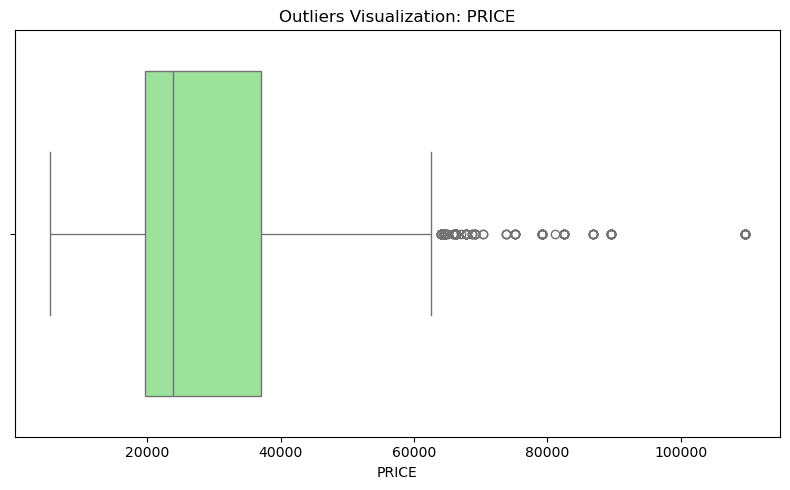

In [266]:
#Plot boxplot untuk setiap kolom numerik
for col in num_cols:
    fig, ax = plt.subplots(figsize=(8,5))
    sns.boxplot(data=df_clean, x=col, ax=ax, color='lightgreen')
    
    ax.set_title(f'Outliers Visualization: {col}')
    plt.tight_layout()
    plt.show()

# 5. Exploratory Data Analysis (EDA)

## Penambahan Kolom

In [271]:
def calculate_total_cost(row):
    if row['SERVICE'] == 'PTP':
        return row['COST_A'] + row['COST_B']
    else:
        return row['COST_A'] + row['COST_B'] + row['COST_C']

df_clean.loc[:,'TOTAL_COST'] = df_clean.apply(calculate_total_cost, axis=1)

df_clean = df_clean[df_clean['WEIGHT'] >= 10]
df_clean['REVENUE'] = df_clean['WEIGHT'] * df_clean['PRICE']
df_clean['PROFIT'] = df_clean['REVENUE'] - df_clean['TOTAL_COST']
df_clean['COST_RATIO'] = df_clean.apply(
    lambda row: row['TOTAL_COST'] / row['REVENUE'] if row['REVENUE'] != 0 else 0, 
    axis=1)
df_clean

,DATE,AIRLINES,ORIGIN,DESTINATION,FLIGHT_NUMB,COLLY,WEIGHT,CUSTOMER,CUST_ID,SERVICE,COST_A,COST_B,COST_C,PRICE,TOTAL_COST,REVENUE,PROFIT,COST_RATIO
0,2024-07-01,CITILINK,JAKARTA,MEDAN,QG-0916,5,72.0,PT DINDA SETIA KIRANA,DSK,PTP,9324,4343,2809,11300,13667,813600.0,799933.0,0.016798
1,2024-07-01,CITILINK,JAKARTA,BALIKPAPAN,QG-0436,1,15.0,PT FAJRI ABANGDA PRATAMA,FAP,PTP,15984,4343,1258,31200,20327,468000.0,447673.0,0.043434
2,2024-07-01,CITILINK,JAKARTA,MAKASSAR,QG-0426,6,77.0,PT FAJRI ABANGDA PRATAMA,FAP,PTP,13653,4343,1594,34800,17996,2679600.0,2661604.0,0.006716
3,2024-07-01,CITILINK,JAKARTA,BATAM,QG-0968,6,95.0,PT DINDA SETIA KIRANA,DSK,PTP,10545,4343,2280,11050,14888,1049750.0,1034862.0,0.014182
4,2024-07-01,CITILINK,JAKARTA,BALIKPAPAN,QG-0424,7,100.0,PT DINDA SETIA KIRANA,DSK,PTP,15984,4343,1258,22100,20327,2210000.0,2189673.0,0.009198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28657,2024-07-07,FREIGHTER,JAKARTA,TARAKAN,ECA245,2,21.0,PT BAYA SKENA MENYALA,BSM,DTD,35964,3888,0,42870,39852,900270.0,860418.0,0.044267
28658,2024-07-07,FREIGHTER,JAKARTA,TARAKAN,ECA245,2,10.0,PT BAYA SKENA MENYALA,BSM,DTD,35964,3888,0,42870,39852,428700.0,388848.0,0.092960
28659,2024-07-07,FREIGHTER,JAKARTA,TARAKAN,ECA245,5,51.0,PT DINDA SETIA KIRANA,DSK,PTP,35964,3888,0,38200,39852,1948200.0,1908348.0,0.020456
28660,2024-07-07,FREIGHTER,JAKARTA,TARAKAN,ECA245,11,123.0,PT DINDA SETIA KIRANA,DSK,PTP,35964,3888,0,38200,39852,4698600.0,4658748.0,0.008482


In [272]:
df_clean['ORIGIN'].unique()

array(['JAKARTA', 'DENPASAR', 'MEDAN', 'PONTIANAK', 'SOLO', 'MAKASSAR',
       'SURABAYA', 'SEMARANG', 'BALIKPAPAN', 'PEKANBARU', 'KENDARI',
       'BANJARMASIN', 'PADANG', 'BATAM', 'PALU', 'PALANGKARAYA', 'MANADO'],
      dtype=object)

Selanjutnya, akan dilakukan pengecekan nilai perhitungan statistik

In [273]:
df_clean.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE,24993,2024-07-03 23:33:40.165646336,2024-07-01 00:00:00,2024-07-02 00:00:00,2024-07-04 00:00:00,2024-07-06 00:00:00,2024-07-07 00:00:00,NaN
COLLY,24993.0,9.234986,1.0,3.0,8.0,15.0,217.0,7.888459
WEIGHT,24993.0,205.175524,10.0,33.0,74.0,145.0,1435628.0,11595.639439
COST_A,24993.0,20362.272756,3330.0,10545.0,14153.0,27972.0,96348.0,13331.912846
COST_B,24993.0,3503.598648,1144.0,3060.0,3282.0,4343.0,7596.0,818.91885
COST_C,24993.0,1688.601768,0.0,1343.0,1594.0,2280.0,4085.0,857.729879
PRICE,24993.0,28307.921818,5320.0,19690.0,23770.0,37000.0,109700.0,12899.200773
TOTAL_COST,24993.0,25036.864202,5496.0,15387.0,19252.0,32315.0,100691.0,13428.442331
REVENUE,24993.0,9827656.291542,53200.0,824500.0,2079930.0,3780000.0,157488391600.0,1006757641.11974
PROFIT,24993.0,9802619.42734,43418.0,798224.0,2049811.0,3757111.0,157488293695.0,1006757188.987016


## A) Jenis Layanan Apa yang Berhasil Menghasilkan Penjualan Lebih Tinggi Daripada Median? Apakah Pelayanan PTP atau DTD? 

## B) Customer Mana yang Menghasilkan Penjualan Terbanyak?